# How to Uniformly Sample Points in a Circle

For any reason, we want to sample points uniformly in a circle.

We can sample values for $r$ and $\theta$ in polar coordinates and then visualize the points with a scatter plot to see if it went well...

In [1]:
%matplotlib inline
import math
from random import uniform

import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.facecolor"] = (1.0, 1.0, 1.0, 1)
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["legend.fontsize"] = "x-large"
plt.rcParams["axes.titlesize"] = "x-large"
plt.rcParams["axes.labelsize"] = "x-large"
plt.rcParams["xtick.labelsize"] = "x-large"
plt.rcParams["ytick.labelsize"] = "x-large"

In [3]:
N = 10000

In [4]:
r = np.random.uniform(size=N)
theta = np.random.uniform(0, 2 * np.pi, size=N)

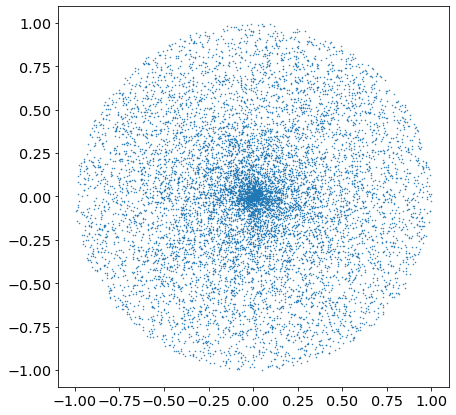

In [5]:
plt.scatter(r * np.cos(theta), r * np.sin(theta), s=1, marker=".")
plt.show()

Something is wrong here. The density around the center is too high compared to the rest.

## Intuitive Explanation

Let's vary the value of $\theta$ for two values of $r$.

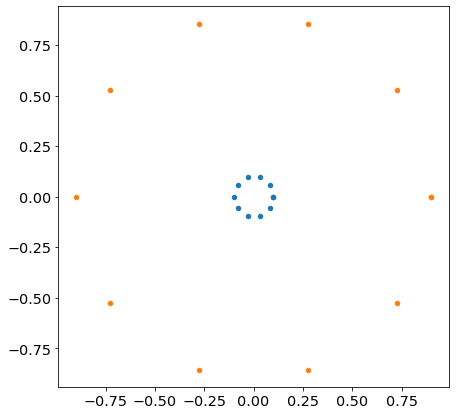

In [6]:
theta_lin = np.linspace(0, 2 * np.pi, 11)
plt.scatter(0.1 * np.cos(theta_lin), 0.1 * np.sin(theta_lin), s=20)
plt.scatter(0.9 * np.cos(theta_lin), 0.9 * np.sin(theta_lin), s=20)
plt.show()

At constant number of points sampled (here $10$), it's obvious that the bigger $r$, the lower the density on the ring of radius $r$.

In other words, the outer rings with larger radii have lower densities than the inner ones.

Thus, the further away from the center, the more we need to sample points in order to rebalance the densities for each radius.

This explanation however doesn't tell us how to sample the right way.

A solution is to sample in cartesian coordinates $x$ and $y$ directly, and remove points falling outside of the circle (rejection sampling).

In [7]:
def rejection_sampling(N):
    x_arr = [0] * N
    y_arr = [0] * N
    i = 0
    while i < N:
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        if x**2 + y**2 > 1:
            continue
        x_arr[i] = x
        y_arr[i] = y
        i += 1
    return x_arr, y_arr

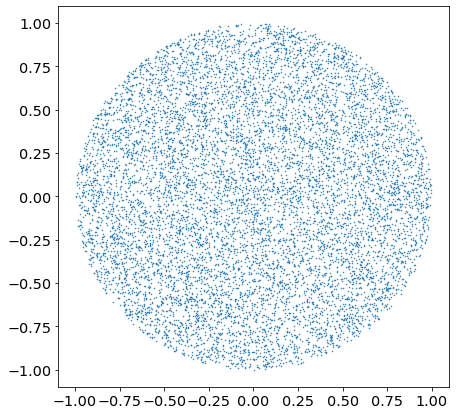

In [8]:
x, y = rejection_sampling(N)
plt.scatter(x, y, s=1, marker=".")
plt.show()

But we can do better (¬‿¬)

## Mathematical Explanation

![](area.png)

For small variations of $r$ and $\theta$, we have a small variation of area $dA$:

$$dArea = rdrd\theta$$

We can see that the extra $r$ will scale the density. Instead, we can rewrite it that way:

$$dArea = \frac{1}{2}d(r^2)d\theta$$

The solution is to sample uniformly in $\theta$ and in $u = r^2$ that is $r=\sqrt{u}$.

Let's try this solution:

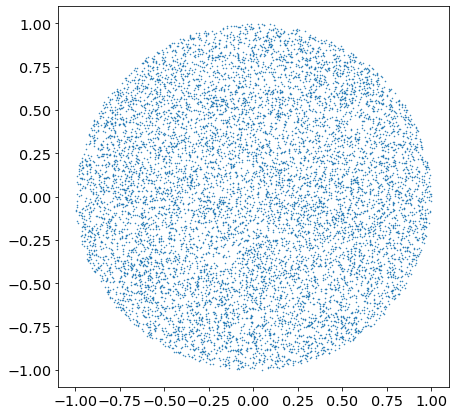

In [9]:
plt.scatter(np.sqrt(r) * np.cos(theta), np.sqrt(r) * np.sin(theta), s=1, marker=".")
plt.show()

## Benchmarks

Rejection sampling is much simpler, but is it faster?

In [10]:
def sqrt_solution(N):
    x_arr = [0] * N
    y_arr = [0] * N
    for i in range(N):
        r_sqrt = math.sqrt(uniform(0, 1))
        theta = uniform(0, 2 * np.pi)
        x_arr[i] = r_sqrt * math.cos(theta)
        y_arr[i] = r_sqrt * math.sin(theta)
    return x_arr, y_arr

In [11]:
%timeit rejection_sampling(N)

17.9 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit sqrt_solution(N)

11.9 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The solution with the square root is surprisingly faster, probably because of the dynamic branching slowing things down in the rejection sampling solution.